딥 러닝 model을 깊이 쌓으면 항상 성능이 좋아지는가? 그것은 정답이 아니다. 레이어를 깊이 쌓았을 때, Vanishing / Exploding Gradient 문제가 발생하여 모델의 수렴을 방해하는 문제가 생긴다. 이에 대응방법을 알아보자.


# Degradation Problem

Deeper networks를 사용할때 Degradation Problem이 발견된다. Degradation Problem이란, network의 depth가 커질 수록 accuracy는 점점 진전이 없어져 버리는상태가 되고, degradation이 진행된다. 이때 degradation은 overfitting되기 때문에 생기는 것이 아니며, 더 많은 layer를 넣을 수록 training error가 더 높아진다.

In [2]:
from IPython.display import Image

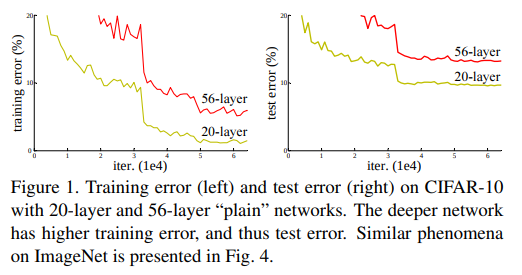

In [3]:
Image("./resnet_1.png")

위 사진은 20개의 layer를 쌓은 모델과 56개의 layer을 쌓은 모델의 error을 나타낸 모습입니다. 20개의 layer을 쌓은 모델이 56개의 layer을 쌓은 모델보다 학습 에러가 낮은 것을 확인 할 수 있습니다. test error 역시 20개의 layer가 더 좋은 성능을 가지는 것을 볼 수 있다. 위 현상은 overfitting도 아니고, 깊은 모델이 제대로 최적화를 수행하고 있지 못하는 것을 의미한다.

# Residual Block

ResNet은 깊은 네트워크의 학습이 어려운 점을 해결하기 위해서 layer의 입력값을 확용하여 layer가 residual function을 학습하도록 한다. 

단순히 말하자면 일종의 지름길(shortcut connection)을 통해서 layer가 입력값을 직접 참조하도록 layer을 변경했다고 보면 된다.

shortcut connection은 앞에서 입력으로 들어온 값을 network의 출력층에 곧바로 더해준다.

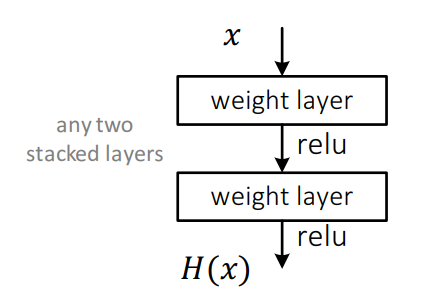

In [12]:
Image("./resnet_2.png")

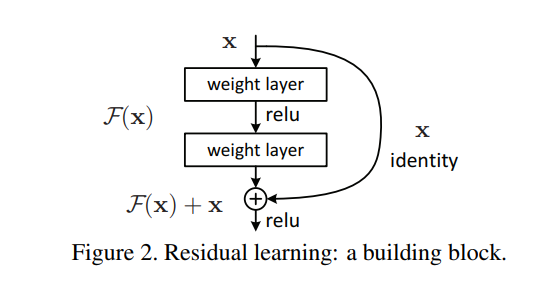

In [16]:
Image("./resnet_3.png")

그렇다면 레이어를 많이 쌓았다고 해서 모델 성능이 떨어진다는 것은 어떻게 증명을 해야할까? 많이 겹쳐 쌓은 레이어는 일반적으로 학습이 제대로 이루어지지 않았다는 뜻이 된다.

여기서 논문에서는 학습해야 할 layer H(x)를 F(x) + x 으로 만들면 어떨까? 라는 생각을 한다. 설령 F(x)가 Vanishing Gradient 현상으로 전혀 학습이 안되어 zero mapping이 될지라도, 최종 H(x)가 최소한 identity mapping이라도 퇼테니 성능 저하는 발생하지 않게 된다는 이론이다.

그렇다면 F(x)는 학습해야 할 layer H(x)에다 x를 뺀 형태, 잔차함수가 되는데 이것은 H(x)를 직접 학습하는 것 보다 훨씬 쉽지 않을까? 라는 것이다. layer을 깊이 쌓을 수록 F(x)는 0에 가까운 작은 값으로 수렴해도 충분하기 때문이다. 실험해보니 실제로 안정적으로 학습이 되며, layer을 깊이 쌓을 수록 성능이 향상되는 것이 확인되었기 때문이다.

정리하자면 일반적인 Neural Network는 H(x) 자체를 학습한다. resnet_2 참조

Resnet같은 경우에는 residual function을 학습하도록 강제한다.

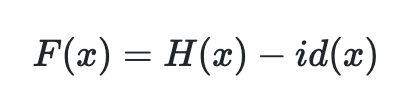

In [14]:
Image("./resnet_4.png")

위 공식은 다음과 같이 정리할 수 있다.

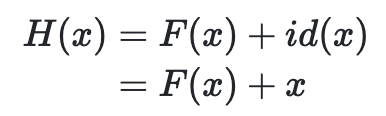

In [15]:
Image("./resnet_5.png")

위 공식은 아래의 그림처럼 그래프를 그릴 수 있다!

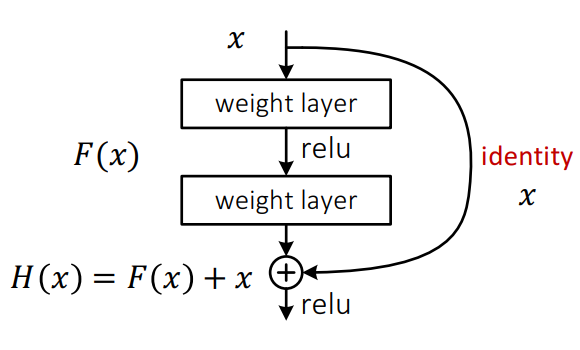

In [17]:
Image("./resnet_6.png")

resnet을 적용하지 않은 plain network과 resnet을 적용한 residual network를 간단히 블록으로 나타낸 것이다. residual network에는 매 layer마다 기존 layer 값 x를 더하는것을 볼 수 있다.

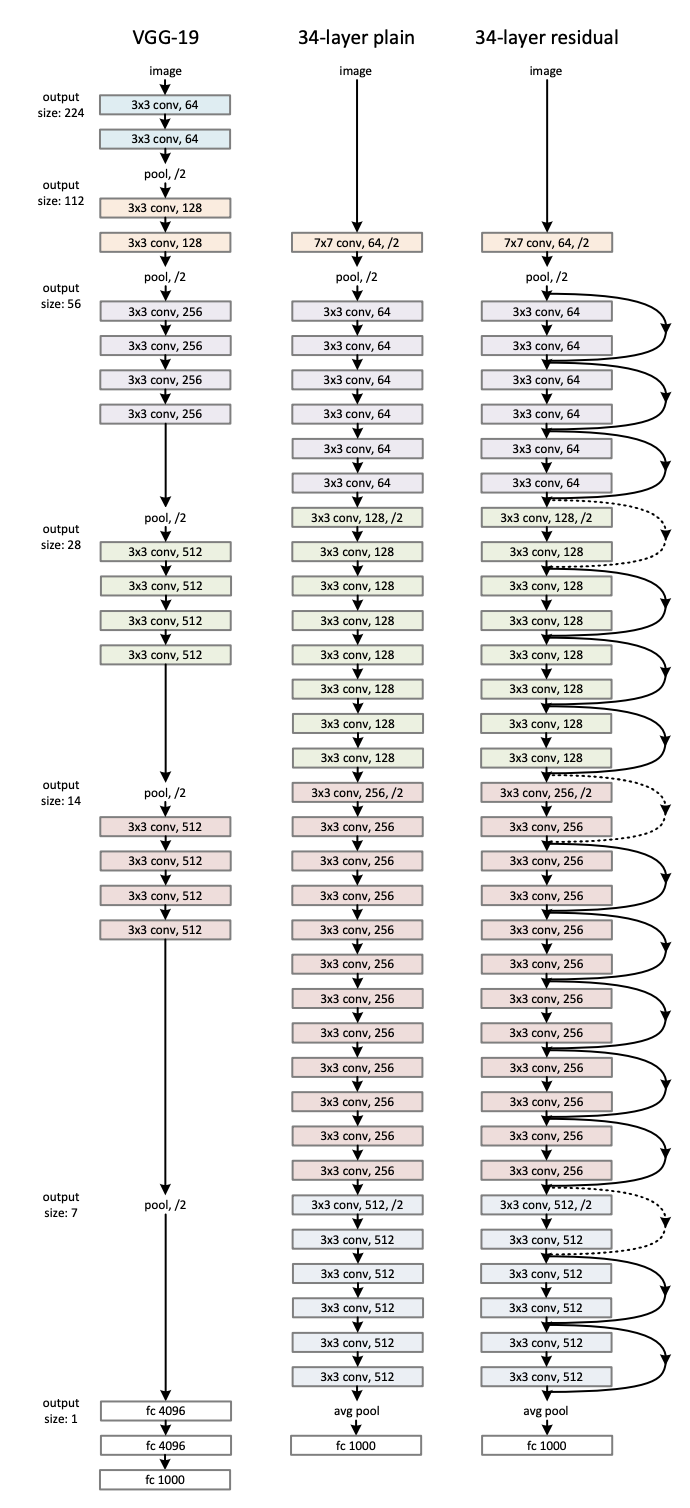

In [22]:
Image("./resnet_7.png")

그렇다면, 이 아이디어를 검증하기 위해 논문에 실린 실험을 살펴보자.

network가 깊어짐에 따라 발생하는 경사 소실 문제를 Resnet이 해결함을 보여주기 위해서 shortcut connection의 유무와 network depth을 다르게 한 4가지 모델을 구현하였다.

18개층과 34개층을 갖는 network를, shortcut이 없는 network과 resnet 두가지를 구현해 4가지 network을 구현해보았다. 이후 Imagenet 데이터를 사용해 훈련시킨 뒤 분석하였다.

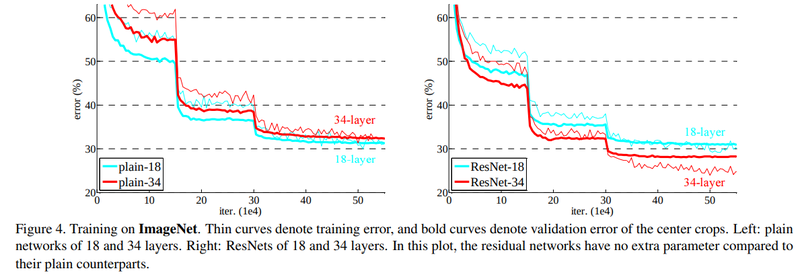

In [24]:
Image("./resnet_8.png")

왼쪽 사진은 shortcut이 없는 network(plain network) 오른쪽은 resnet을 구현한 network이다. 

plain network같은 경우, 34개 layer을 갖는 network가 18개의 layer을 갖는 network 보다 error rate가 높다. 하지만 resnet을 적용한 오른쪽에선 layer가 깊어져도 학습이 잘 되는 것을 볼 수 있다. 그렇다면 validation에선 어떨까?

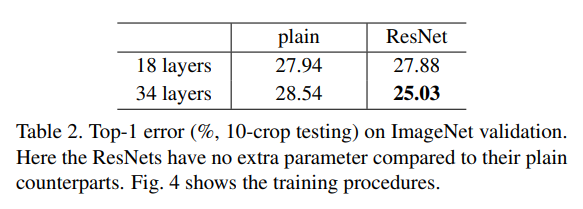

In [25]:
Image("./resnet_9.png")

Top-1 error이란, model이 가장 높은 확률 값으로 prediction한 class 1개와 일치하는지의 오류율이다. 당연히 낮을수록 좋은 수치이다.

plain network는 depth가 깊어질 수록 오류율이 높아졌다. 아마도 Vanishing Gradient현상 때문에 훈련이 잘 되지 않아졌다.

반면 resnet에서는 depth가 깊어질 수록 오류율일 감소했다. Residual Block 효과를 입증했다!